In [8]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

## PEG 85 chrono.xlsx visualization

In [9]:
# Load the Excel file
file_path = 'PEG 85 chrono.xlsx'
xls = pd.ExcelFile(file_path)


In [10]:
# Load the first sheet into a DataFrame
first_sheet_df = xls.parse(xls.sheet_names[0])

# Display the first few rows of the DataFrame
print(first_sheet_df.head(2))
first_sheet_df.columns

   time/s    time/h     Ewe/V
0       0  0.000000  0.007964
1      20  0.005556  0.011016


Index(['time/s', 'time/h', 'Ewe/V'], dtype='object')

In [11]:
first_sheet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21087 entries, 0 to 21086
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time/s  21087 non-null  int64  
 1   time/h  21087 non-null  float64
 2   Ewe/V   21087 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 494.4 KB


In [12]:

# Define the time columns
time_column = ['time/s', 'time/h']

# Function to calculate similarity percentage
def calculate_similarity(col1, col2, df=first_sheet_df):
    comparison = df[col1] == df[col2]
    matching_count = comparison.sum()
    total_count = comparison.count()
    proportion_identical = matching_count / total_count
    return proportion_identical

# Compare each pair of time columns and print the results
similarity_results = {}
for i in range(len(time_column)):
    for j in range(i + 1, len(time_column)):
        col1 = time_column[i]
        col2 = time_column[j]
        similarity = calculate_similarity(col1, col2)
        similarity_results[(col1, col2)] = similarity
        print(f"Similarity between {col1} and {col2}: {similarity:.2%}")

Similarity between time/s and time/h: 0.00%


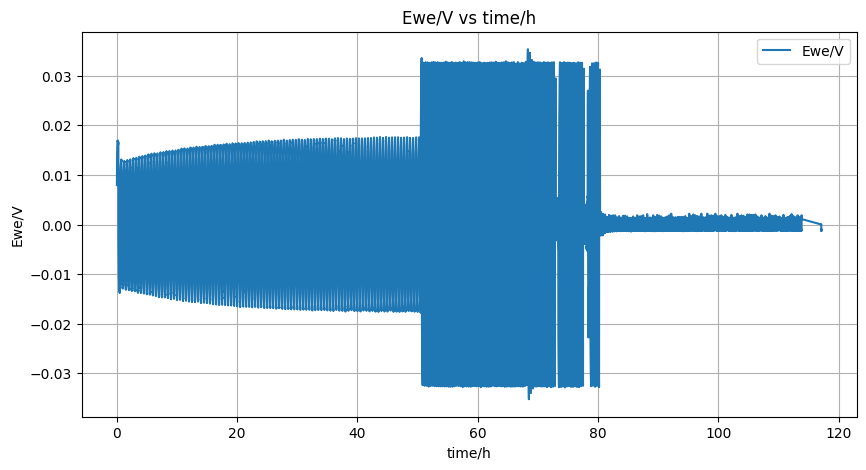

In [13]:
# Define time column and columns to plot
time_column = ['time/h']
columns_to_plot = ['Ewe/V']

# Plot each relevant column against 'time/hours'
for col in columns_to_plot:
    for time_col in time_column:
        plt.figure(figsize=(10, 5))
        plt.plot(first_sheet_df[time_col], first_sheet_df[col], label=col)
        plt.xlabel(time_col)
        plt.ylabel(col)
        plt.title(f'{col} vs {time_col}')
        plt.legend()
        plt.grid(True)
        plt.show()